In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

2024-12-06 11:28:24.227011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733477304.249811   30277 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733477304.256143   30277 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 11:28:24.278064: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## а) навчить мережу з нуля (from scratch)

In [2]:
dataset_url = "https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)

In [3]:
data_dir = pathlib.Path(archive + "/Rice_Image_Dataset").with_suffix('')
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

75000


In [4]:
batch_size = 32
img_height = 25
img_width = 25

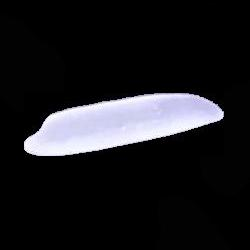

In [5]:
basmati = list(data_dir.glob('Basmati/*'))
PIL.Image.open(str(basmati[0]))

In [6]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

ds_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 75000 files belonging to 5 classes.
Using 45000 files for training.


2024-12-06 11:28:41.785224: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 75000 files belonging to 5 classes.
Using 30000 files for validation.
Found 75000 files belonging to 5 classes.
Using 30000 files for validation.


2024-12-06 11:28:46.141490: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


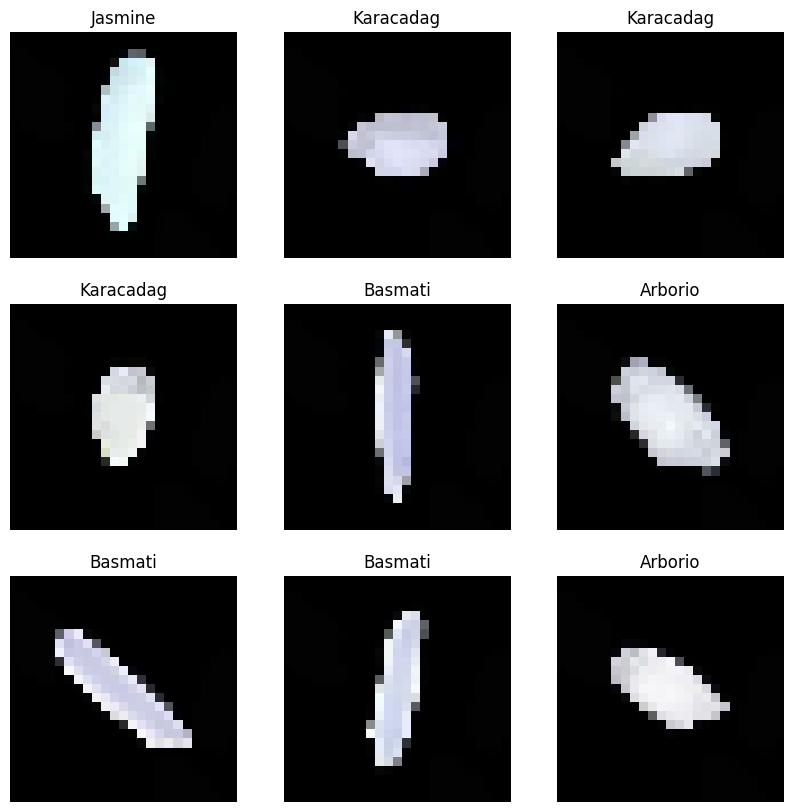

In [7]:
class_names = ds_train.class_names

num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 25, 25, 3)
(32,)


In [9]:
ds_train = ds_train.cache()
ds_val = ds_val.cache()

ds_train = ds_train.shuffle(buffer_size=1000)

In [10]:
model = tf.keras.Sequential([
	tf.keras.layers.Rescaling(1./25),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy'])


history = model.fit(
	ds_train,
	# steps_per_epoch=10,
	batch_size=batch_size,
	validation_data=ds_val,
	epochs=20,
	verbose = 1
)

Epoch 1/20


/home/anna/Documents/Cur-Lec/Data-analysis-2024/Data-Analysis/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.8810 - loss: 0.3087 - val_accuracy: 0.9509 - val_loss: 0.1426
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9702 - loss: 0.0870 - val_accuracy: 0.9827 - val_loss: 0.0530
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9777 - loss: 0.0654 - val_accuracy: 0.9838 - val_loss: 0.0500
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9836 - loss: 0.0514 - val_accuracy: 0.9884 - val_loss: 0.0373
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9849 - loss: 0.0473 - val_accuracy: 0.9753 - val_loss: 0.0708
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9729 - val_loss: 0.0781
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9839 - val_loss: 0.0488
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9873 - loss: 0.03

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

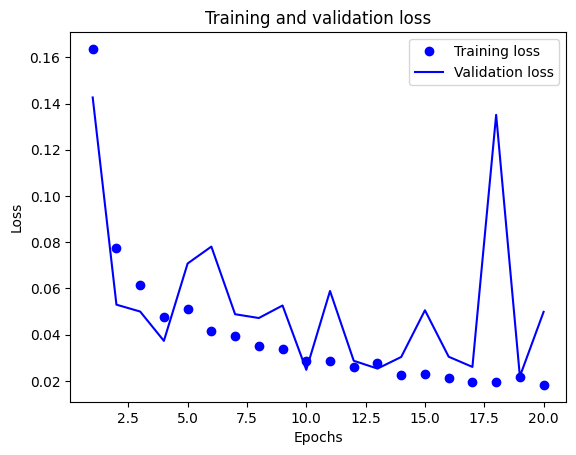

In [12]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
score = model.evaluate(ds_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.049867548048496246
Test accuracy: 0.9856333136558533
